In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
#rename some long columns names
df.rename(columns={'Economy (GDP per Capita)':'GDP' , 'Health (Life Expectancy)':'Health' ,'Trust (Government Corruption)':'Trust' } , inplace=True)
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


# check null values

In [6]:
df.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP                  0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

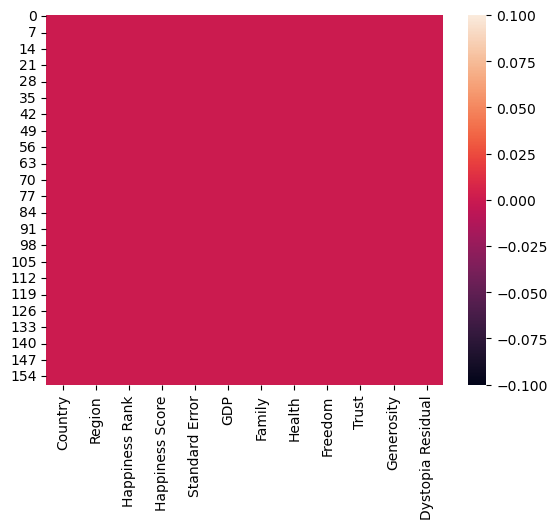

In [7]:
sns.heatmap(df.isnull())
plt.show()

# Visualizing Data

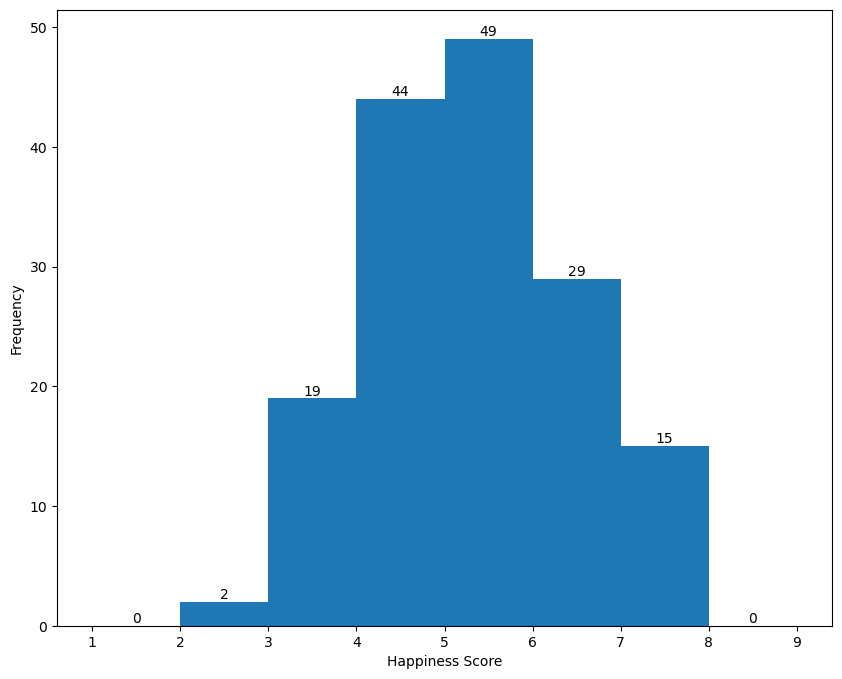

In [8]:
figure , ax = plt.subplots(figsize=(10,8))
hist = plt.hist(df['Happiness Score'] , bins=np.arange(1,10))
for hist in ax.containers:
    ax.bar_label(hist)
plt.xlabel('Happiness Score') 
plt.ylabel('Frequency')
plt.show()

we see from above that the major of countries(49 countries) have happiness score between 5 and 6
while 44 countries have happiness rate between 4 and 5

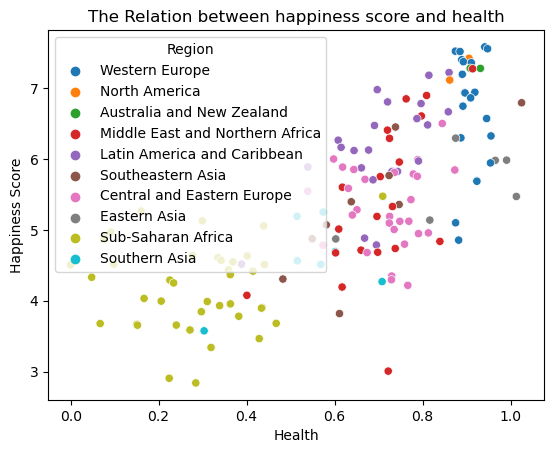

In [9]:
sns.scatterplot(x=df['Health'] , y=df['Happiness Score'] , hue = df['Region'] , data = df)
plt.title('The Relation between happiness score and health')
plt.show()

from above we see the health is better in western Europe , North America ,Austuralia and Newzeland so Happiness Score is higher while it is the lowest in Sub Saharan Africa

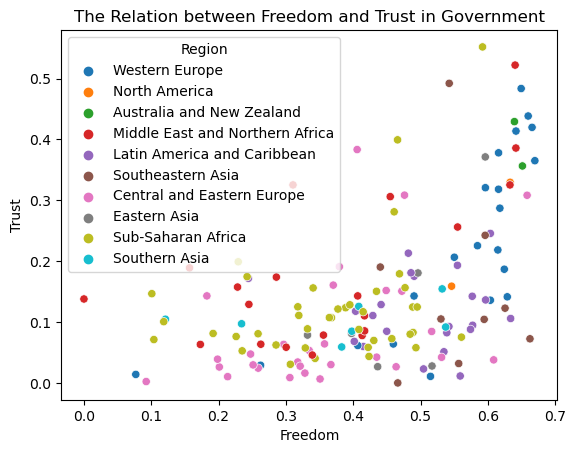

In [10]:
sns.scatterplot(x=df['Freedom'] , y=df['Trust'] , hue = df['Region'] , data = df)
plt.title('The Relation between Freedom and Trust in Government')
plt.show()

Freedom of speaking and critisizing the governments are higher in western Europe and Northern America while Totalitaniarism is clear in lower rates of Freedon in Sub Saharan Africa and Central and Eastern Europe

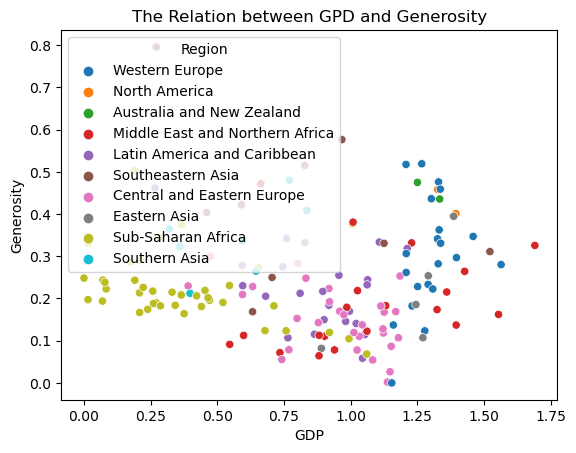

In [11]:
sns.scatterplot(x=df['GDP'] , y=df['Generosity'] , hue = df['Region'] , data = df)
plt.title('The Relation between GPD and Generosity')
plt.show()

Generosity is higher in western Europe and northern America

The middle east and northern africa have high GPD with lower Generosity because of corruption

Sub Saharan Africa has low GPD with the lowest Generosity

In [12]:
# now we delete columns we will not use in evaluating Happiness Score
df.drop(['Country', 'Region', 'Happiness Rank','Dystopia Residual','Standard Error'],axis=1,inplace=True)
df.head(5)

,Happiness Score,GDP,Family,Health,Freedom,Trust,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [13]:
df.nunique().to_frame('no of total unique values')

,no of total unique values
Happiness Score,157
GDP,158
Family,158
Health,157
Freedom,158
Trust,157
Generosity,158


From above we notice that all columnn have unique values and their total numbers are too close or equal to dataset number of rows so all columns contain numerical continuous data

In [13]:
df.describe()

,Happiness Score,GDP,Family,Health,Freedom,Trust,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


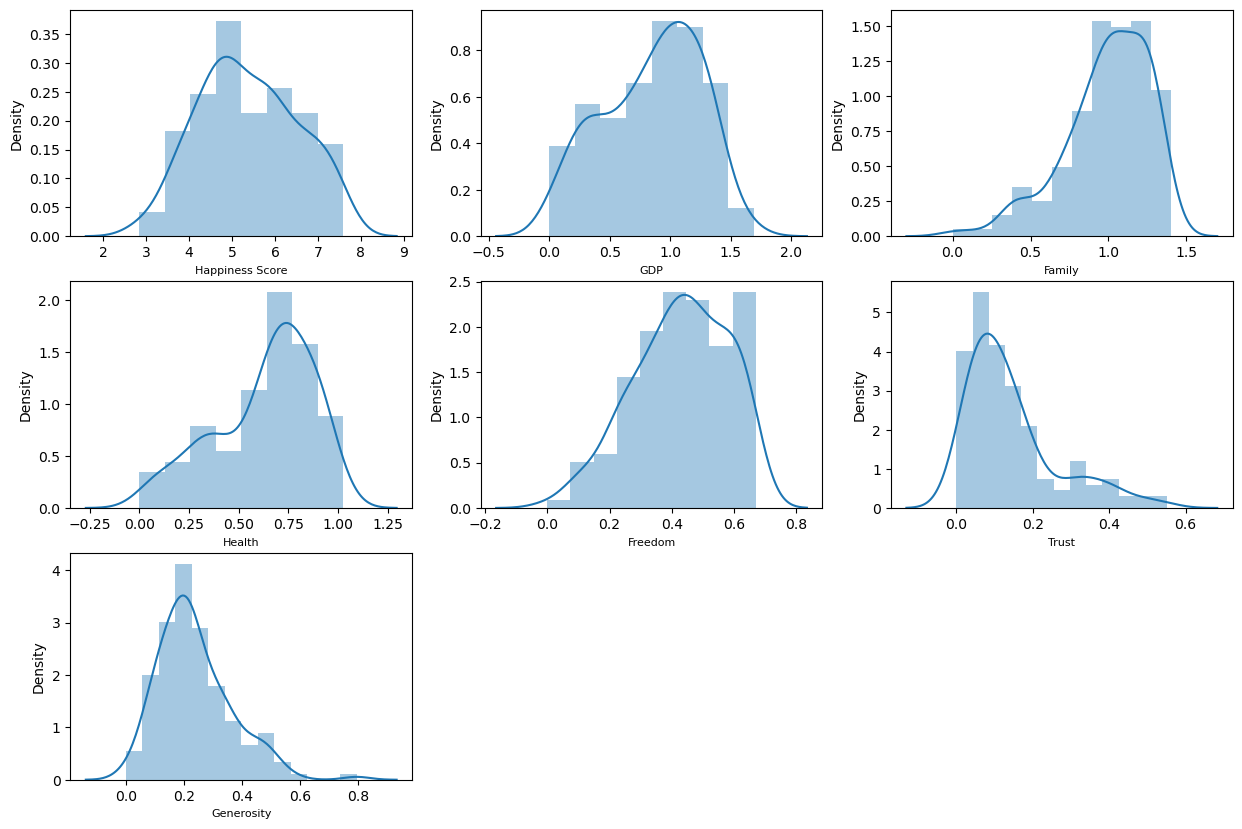

In [14]:
plt.figure(figsize=(15,10))
num = 1
for i in df.columns :
    if num <= 7:
        ax = plt.subplot(3,3,num)
        sns.distplot(df[i])
        plt.xlabel(i , fontsize=8)
    num +=1
plt.show()    

columns family is skewd to left and  Trust and Generosity clumns are skewed to right

# Checking Outliers

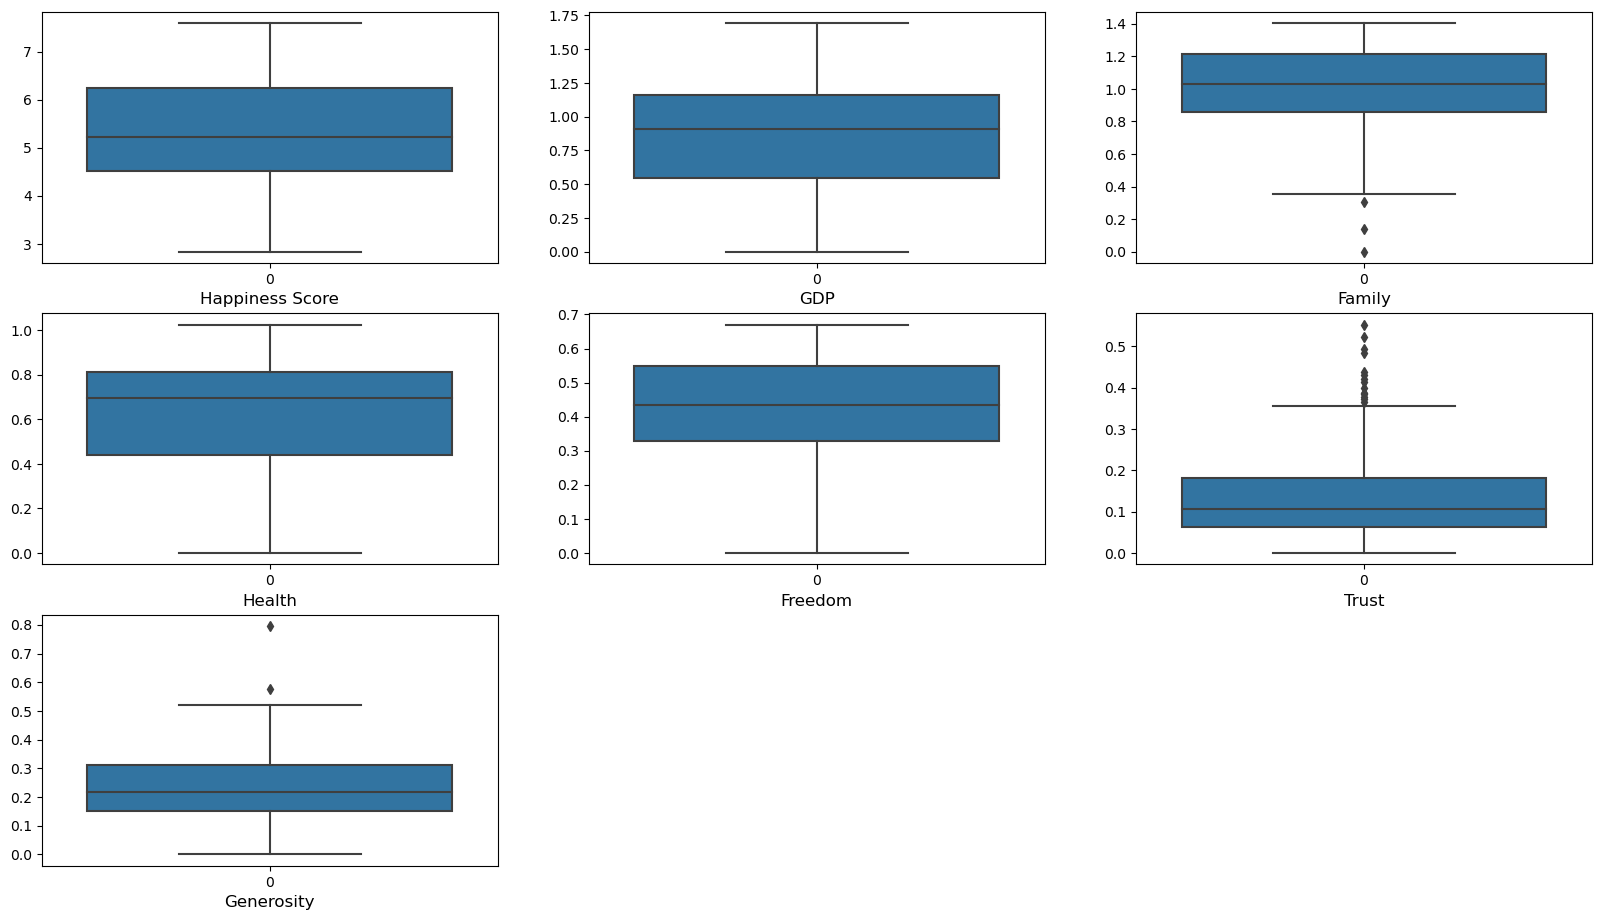

In [15]:
plt.figure(figsize=(20,15))
num=1
for i in df.columns :
    if num <= 7 :
        ax = plt.subplot(4,3,num)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=12)
    num+=1
plt.show()    

we see columns Family ,Trust and Generosity have outliers so we will remove them

In [16]:
#using Z score
from scipy.stats import zscore

In [17]:
outliers = df[['Family','Trust','Generosity']]
z = np.abs(zscore(outliers))

In [18]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(153, 7)

In [19]:
print('percentage out loss is : ',((df.shape[0]/df1.shape[0])/df.shape[0])*100)

percentage out loss is :  0.6535947712418302


In [20]:
#use IQR method
out = df[['Family','Trust','Generosity']]
q1 = out.quantile(0.25) # 1st percentile
q3 = out.quantile(0.75) # 3rd percentile
IQR = q3 - q1
df2 = df[~((df < (q1 - 1.5*IQR))|(df > (q3 + 1.5*IQR))).any(axis =1)]

In [21]:
df2.shape

(139, 7)

In [22]:
print('percentage out loss is : ',((df.shape[0]/df2.shape[0])/df.shape[0])*100)

percentage out loss is :  0.7194244604316548


IQR Method is the best

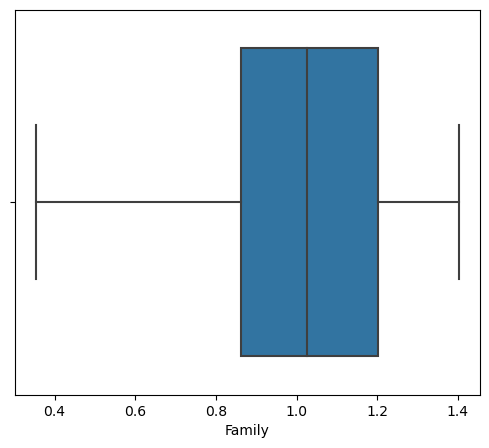

In [23]:
plt.figure(figsize=(6,5))
sns.boxplot(data = df2 , x='Family')
plt.show()

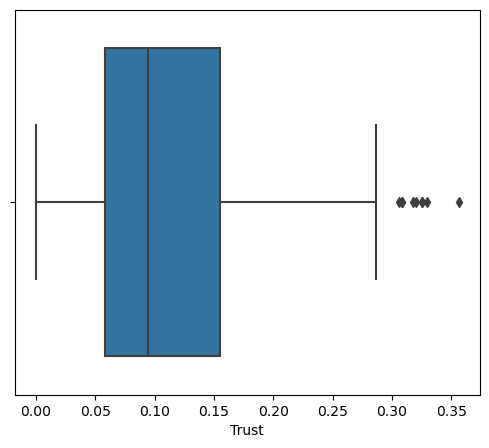

In [24]:
plt.figure(figsize=(6,5))
sns.boxplot(data = df2 , x='Trust')
plt.show()

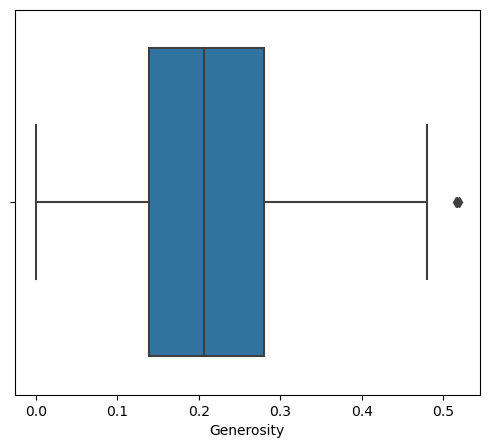

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(data = df2 , x='Generosity')
plt.show()

we removed data as we can

# Check skewness

In [26]:
df2.skew()

Happiness Score    0.136285
GDP               -0.424629
Family            -0.719520
Health            -0.734403
Freedom           -0.392522
Trust              1.036913
Generosity         0.716354
dtype: float64

from above we see skewness of Family and Health is lower than -0.5 but Health distribution is good

skewness of Trust and Generosity are greater than 0.5 so we nedd to modify skewness

In [27]:
for i in ['Family','Trust','Generosity']:
    df2[i] = np.cbrt(df2[i])

In [28]:
df2.skew()

Happiness Score    0.136285
GDP               -0.424629
Family            -1.178688
Health            -0.734403
Freedom           -0.392522
Trust             -0.405387
Generosity        -1.161031
dtype: float64

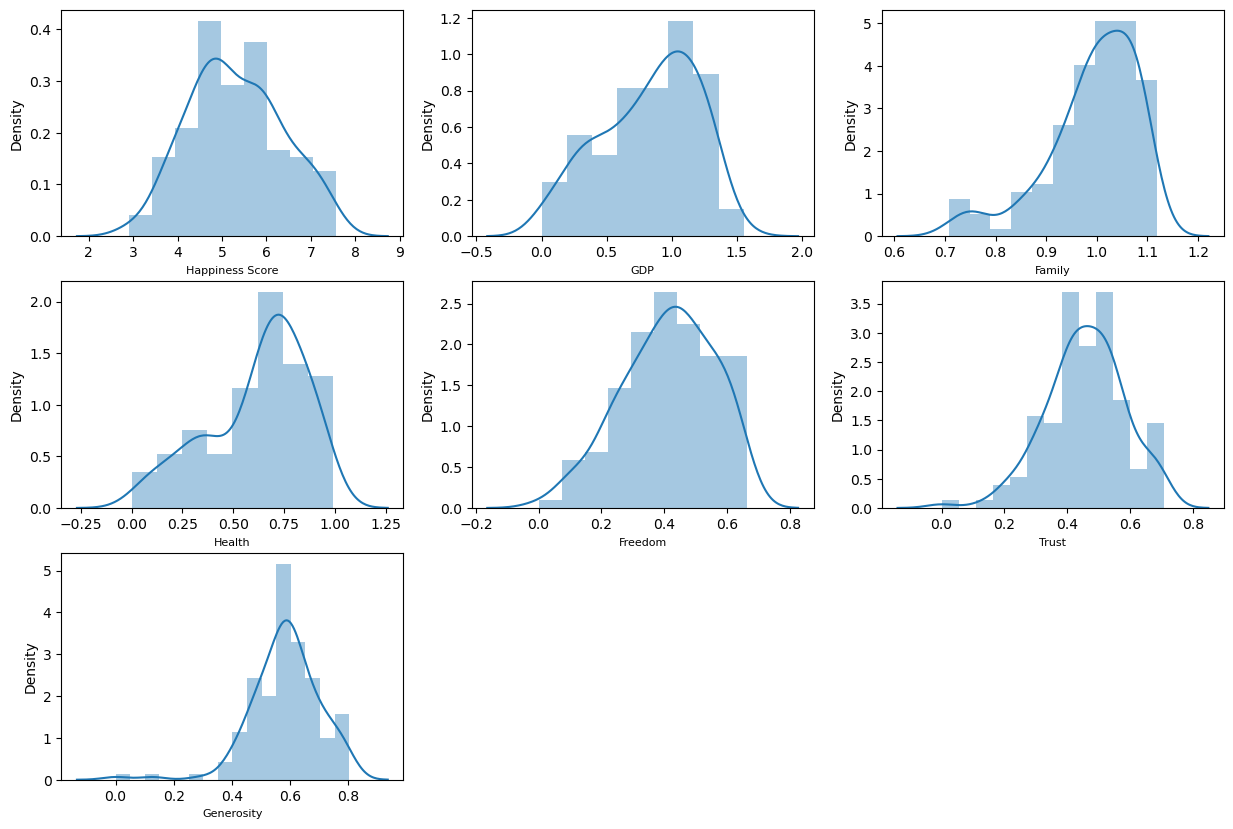

In [29]:
plt.figure(figsize=(15,10))
num = 1
for i in df.columns :
    if num <= 7:
        ax = plt.subplot(3,3,num)
        sns.distplot(df2[i])
        plt.xlabel(i , fontsize=8)
    num +=1
plt.show()    

we reduced skewness as possible as we can

# correlation

In [30]:
df2.corr()

,Happiness Score,GDP,Family,Health,Freedom,Trust,Generosity
Happiness Score,1.000000,0.742803,0.674795,0.692952,0.525966,0.248799,0.108006
GDP,0.742803,1.000000,0.595407,0.793494,0.295200,0.083462,-0.119167
Family,0.674795,0.595407,1.000000,0.446534,0.408224,0.072244,-0.002442
Health,0.692952,0.793494,0.446534,1.000000,0.298864,0.019290,0.006859
Freedom,0.525966,0.295200,0.408224,0.298864,1.000000,0.350068,0.369558
Trust,0.248799,0.083462,0.072244,0.019290,0.350068,1.000000,0.215083
Generosity,0.108006,-0.119167,-0.002442,0.006859,0.369558,0.215083,1.000000


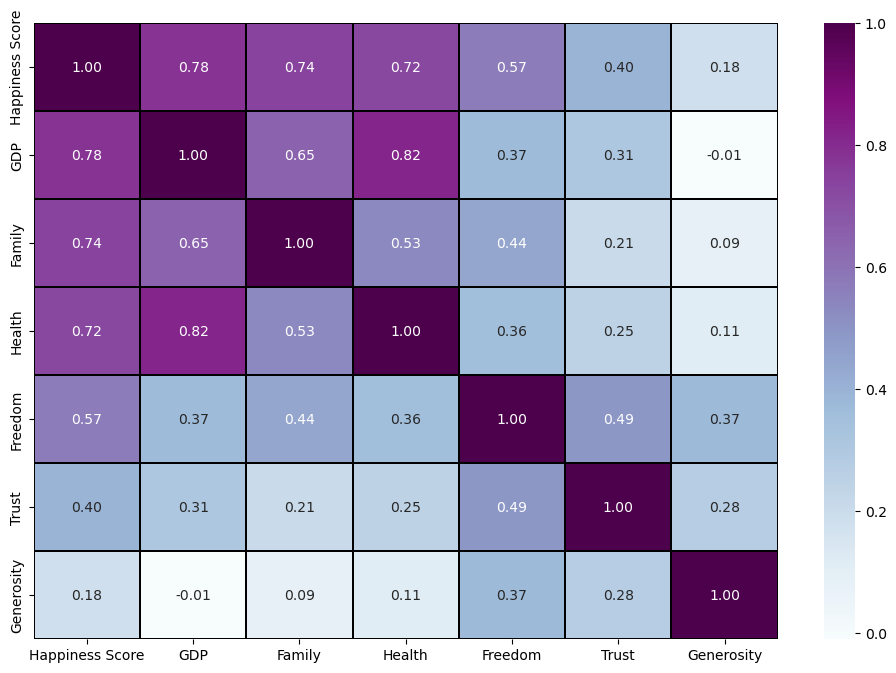

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True , linewidth = 0.1 , cmap='BuPu',linecolor = 'black',fmt = '0.2f')
plt.show()

Happiness Scre has strong correlation with family , Health and GDP

GDP and Health have stong correlation

In [32]:
df2.corr()['Happiness Score'].sort_values(ascending = False)

Happiness Score    1.000000
GDP                0.742803
Health             0.692952
Family             0.674795
Freedom            0.525966
Trust              0.248799
Generosity         0.108006
Name: Happiness Score, dtype: float64

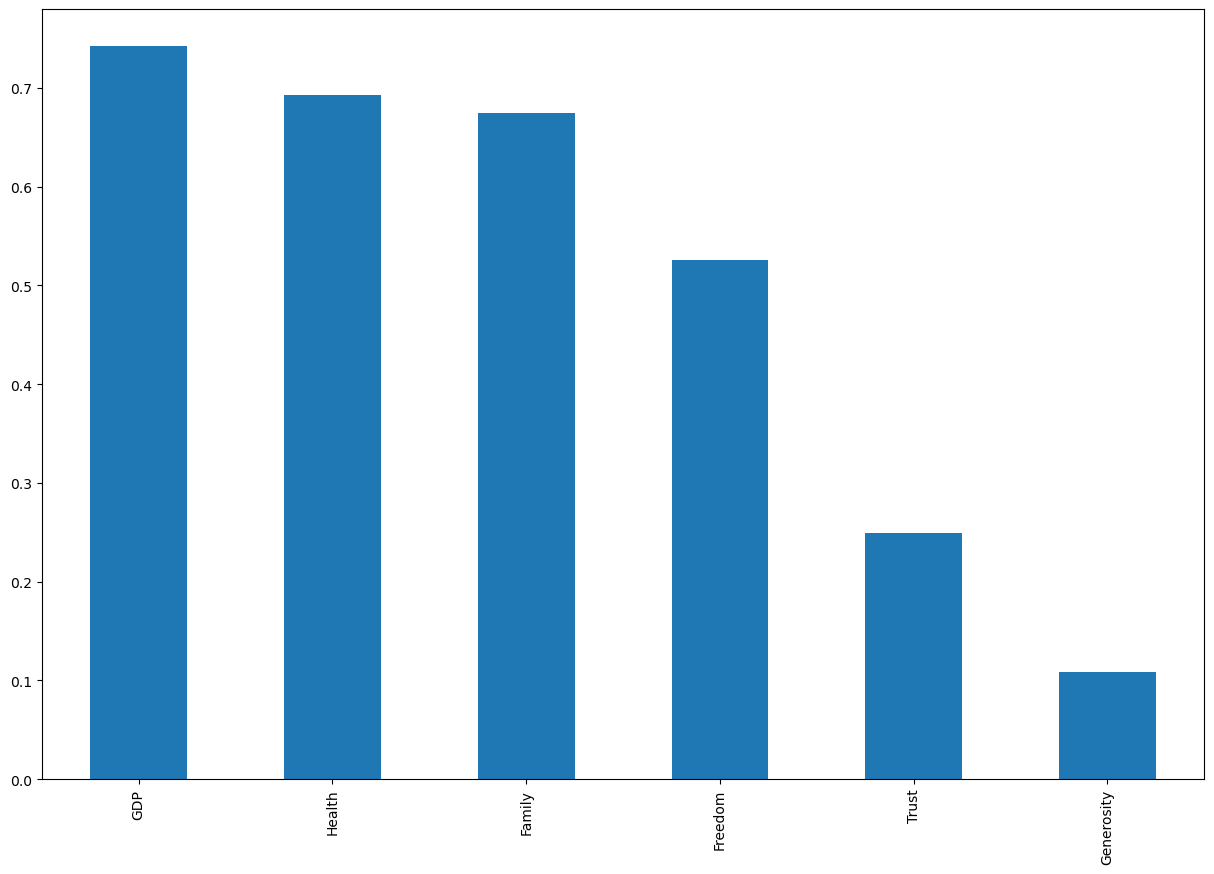

In [33]:
plt.figure(figsize=(15,10))
df2.corr()['Happiness Score'].sort_values(ascending = False).drop('Happiness Score').plot(kind='bar')
plt.show()

Happiness Scre has the stronges corrilation with GDP and the lowest with Genersity

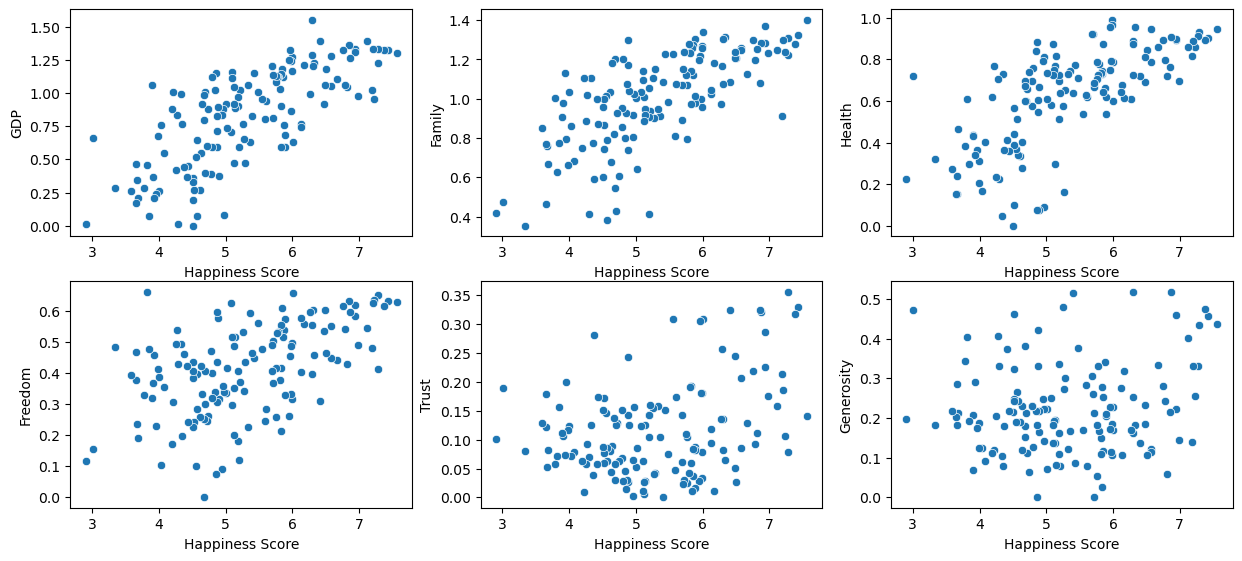

In [34]:
plt.figure(figsize=(15,10))
num = 1
for i in ['GDP', 'Family', 'Health', 'Freedom', 'Trust','Generosity'] :
    if num <= 7:
        ax = plt.subplot(3,3,num)
        sns.scatterplot(x=df2['Happiness Score'] , y=df[i] , data=df2)
        plt.ylabel(i , fontsize=10)
    num +=1
plt.show()  

# Scaling Data

In [35]:
x = df2.drop('Happiness Score' , axis = 1)
y = df2['Happiness Score']

In [36]:
print('Features shape : ',x.shape)
print('label shape : ',y.shape)

Features shape :  (139, 6)
label shape :  (139,)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns=x.columns )
x_scaled

,GDP,Family,Health,Freedom,Trust,Generosity
0,1.277144,1.424217,1.366720,1.487828,0.513874,1.466255
1,1.341644,1.184050,1.190926,1.516601,1.873719,1.571118
2,1.350120,1.052077,1.137659,1.398700,1.808978,1.655137
3,1.361260,1.142752,1.298918,1.641764,2.019855,1.462930
4,1.078694,0.872617,1.225244,0.010945,-0.239696,0.907810
...,...,...,...,...,...,...
134,-0.975043,-0.824812,-1.948375,0.390956,0.856579,0.015186
135,-1.532641,-0.480728,-1.451105,-0.114150,0.380475,0.141284
136,-1.455871,-3.156677,-1.251822,0.499471,-0.207047,-0.145740
137,-0.442632,-2.346359,0.425863,-1.745243,0.937792,1.635203


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['Column'] = x_scaled.columns
vif

,VIF,Column
0,3.614818,GDP
1,1.737561,Family
2,2.865522,Health
3,1.618956,Freedom
4,1.183473,Trust
5,1.280579,Generosity


All VIF are lower than 10 so there is no multicollineraity problem

# Building Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [43]:
#find the best random state
lr= LinearRegression()
accuracy = []
random = []
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled , y ,random_state= i , test_size=0.3)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test,y_pred)
    accuracy.append(accu)
    random.append(i)

In [44]:
rand=pd.DataFrame()
rand['accuracy']= accuracy
rand['number of stats'] = random
rand

,accuracy,number of stats
0,0.596721,1
1,0.726675,2
2,0.695719,3
3,0.680822,4
4,0.661307,5
...,...,...
194,0.674651,195
195,0.751396,196
196,0.775102,197
197,0.705588,198


In [45]:
rand[rand['accuracy']== rand['accuracy'].max()]

,accuracy,number of stats
147,0.831957,148


The best accuracy is 83.1957 % when number of stats is 148

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , random_state= 148 , test_size=0.3)

In [50]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.svm import SVR

In [51]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
las = Lasso()
ri = Ridge()
svr = SVR()

In [52]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    m.fit(x_train , y_train)
    pred_train = m.predict(x_train)
    pred_test = m.predict(x_test)
    print('model name is : ',name)
    print('accuracy score on test data is : ','{:.2f}'.format(r2_score(y_test, pred_test)*100))
    print('accuracy score on train data is : ','{:.2f}'.format(r2_score(y_train, pred_train)*100))
    print('mean absolute error is : ',mean_absolute_error(y_test , pred_test))
    print('mean squared error is : ',mean_squared_error(y_test , pred_test))
    print('Root mean squared is : ',np.sqrt(mean_squared_error(y_test , pred_test)))
    print('\n')

model name is :  LinearRegression
accuracy score on test data is :  83.20
accuracy score on train data is :  68.70
mean absolute error is :  0.3412636425526711
mean squared error is :  0.19819732166459259
Root mean squared is :  0.4451935777441006


model name is :  RandomForestRegressor
accuracy score on test data is :  80.88
accuracy score on train data is :  94.21
mean absolute error is :  0.3657092857142856
mean squared error is :  0.22553640361190427
Root mean squared is :  0.4749067314872514


model name is :  GradientBoostingRegressor
accuracy score on test data is :  77.86
accuracy score on train data is :  98.82
mean absolute error is :  0.3961387316775739
mean squared error is :  0.2611436869279682
Root mean squared is :  0.5110221980775084


model name is :  ExtraTreesRegressor
accuracy score on test data is :  82.80
accuracy score on train data is :  100.00
mean absolute error is :  0.35899452380952385
mean squared error is :  0.20291089952142913
Root mean squared is :  0.4

LinearRegression Model has the best accuracy on test data

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
#choose the best cv
for i in range(2,11):
    score = cross_val_score(m, x_scaled , y , cv= i)
    cv_mean = score.mean()
    print('at cross fold ',i , 'mean is ',cv_mean)
    print('\n')

at cross fold  2 mean is  -5.006754853517122


at cross fold  3 mean is  -4.2864940908930125


at cross fold  4 mean is  -6.754103439284858


at cross fold  5 mean is  -12.361394127247266


at cross fold  6 mean is  -12.116250751927227


at cross fold  7 mean is  -19.471352560758284


at cross fold  8 mean is  -22.06036304226385


at cross fold  9 mean is  -32.38483271134677


at cross fold  10 mean is  -38.1936756688726




cv = 3 is the best

In [55]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    score = cross_val_score(m , x_scaled , y ,scoring='r2')
    print('model name is : ',name)
    mean = score.mean()
    print(score)
    print(mean)
    print('Difference between r2 score and cross validation scre is : ',((r2_score(y_test,m.predict(x_test)) - mean)))
    print('\n')
          

model name is :  LinearRegression
[ -5.23220179  -9.54482558  -8.42578328 -10.69049959  -4.99749991]
-7.778162032810822
Difference between r2 score and cross validation scre is :  8.610118601061195


model name is :  RandomForestRegressor
[-10.90436438 -15.86932093  -6.83797493 -13.88985206  -8.0021439 ]
-11.100731239518671
Difference between r2 score and cross validation scre is :  11.909508114356814


model name is :  GradientBoostingRegressor
[-11.54115076 -16.61359142 -13.04307643 -21.49787361  -7.94153314]
-14.127445074868225
Difference between r2 score and cross validation scre is :  14.906031985314021


model name is :  ExtraTreesRegressor
[ -8.77765667 -17.49916602  -8.67048559 -15.6723246   -7.2077458 ]
-11.56547573656387
Difference between r2 score and cross validation scre is :  12.393435854245542


model name is :  DecisionTreeRegressor
[-10.24444214 -34.04980195 -23.68374249 -42.2271964   -8.17940512]
-23.676917617601227
Difference between r2 score and cross validation scr

Ridge has the lowest Validation score and not overfitted so it will be used as the best model

# Hyperparameters

In [56]:
from sklearn.model_selection import GridSearchCV

In [89]:
param = {'alpha' :[1.0 ,0.05] , 'fit_intercept' :[True , False],
         'solver':['auto','svd','choesky','lspr','sag','saga','lbfgs'],
          'positive':[False , True] ,
        'random_state' :[1,4]}
gscv = GridSearchCV(Ridge() , param , cv=7)
gscv.fit(x_train , y_train)

GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05], 'fit_intercept': [True, False],
                         'positive': [False, True], 'random_state': [1, 4],
                         'solver': ['auto', 'svd', 'choesky', 'lspr', 'sag',
                                    'saga', 'lbfgs']})

In [90]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [94]:
#Final model
final_ridge = Ridge(alpha= 1,
 fit_intercept = True,
 positive = True,
 random_state = 1,
 solver = 'auto')


In [95]:
final_ridge.fit(x_train , y_train)
pred_test = final_ridge.predict(x_test)
print('accuracy of model is : ','{:.2f}'.format(r2_score(y_test , pred_test)*100) , '%')
print('mean absolute error is : ',mean_absolute_error(y_test , pred_test))
print('mean squared error is : ',mean_squared_error(y_test , pred_test))
print('Root mean squared is : ',np.sqrt(mean_squared_error(y_test , pred_test)))

accuracy of model is :  83.18 %
mean absolute error is :  0.341388381021885
mean squared error is :  0.1984370950264117
Root mean squared is :  0.44546278747658785


In [96]:
print('accuracy of training model is : ','{:.2f}'.format(r2_score(y_train , final_ridge.predict(x_train))*100) , '%')

accuracy of training model is :  68.69 %


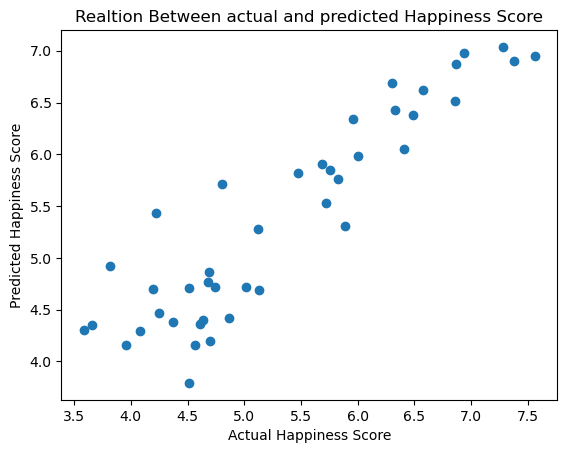

In [97]:
plt.title('Realtion Between actual and predicted Happiness Score')
plt.scatter(y_test , pred_test)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

In [98]:
conclusion = pd.DataFrame()
conclusion['actual'] = y_test
conclusion['predicted'] = pred_test
conclusion

,actual,predicted
113,4.633,4.398514
34,6.411,6.048272
139,3.956,4.158436
84,5.129,4.690838
100,4.867,4.414788
111,4.677,4.770164
151,3.587,4.301816
114,4.610,4.364166
135,4.077,4.294968
85,5.124,5.273893


In [99]:
df2.head(3)

,Happiness Score,GDP,Family,Health,Freedom,Trust,Generosity
1,7.561,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453
4,7.427,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886
6,7.378,1.32944,1.085815,0.89284,0.61576,0.682663,0.780847


In [100]:
print('Predicted Happiness Score of 7.561 is : ',final_ridge.predict(scaler.transform([[1.30232 ,1.119283 ,0.94784 ,0.62877 ,0.521036 ,0.758453]])))

Predicted Happiness Score of 7.561 is :  [6.94799467]


In [101]:
print('Predicted Happiness Score of 7.427 is : ',final_ridge.predict(scaler.transform([[1.32629 ,1.097684 ,0.90563 ,0.63297,0.690742,0.770886]])))

Predicted Happiness Score of 7.427 is :  [6.98122692]


In [102]:
print('Predicted Happiness Score of 7.378 is : ',final_ridge.predict(scaler.transform([[1.32944,1.085815,0.89284,0.61576,0.682663,0.780847]])))

Predicted Happiness Score of 7.378 is :  [6.905869]
